# The Decline in the Number of Private Schools in U.S. Since 2017
This jupyter notebook looks at the number of private schools state-by-state. And also does a comparison of the number of private schools in states versus their population.

The data about the number and location of private schools is from Data.gov. The population data is from the St. Louis Federal Reserve.

I'm currently a teacher at a Private School in Missouri, and I was interested to investigate the trends for private schools around the nation.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import chart_studio.plotly as py
import plotly.express as px
%matplotlib inline

# This imports the Private School Data from the 2017-2018 school year
df_17_18 = pd.read_csv('Private_School_Locations_2017-18.csv')

# This imports the Private School Data from the 2019-2020 school year
df_19_20 = pd.read_csv('Private_School_Locations_-_Current.csv')

# This imports population data by state for 2015-2019 in Thousands (Taken from STL Federal Reserve)
df_pop = pd.read_csv('Pop_by_State.csv')

In [27]:
# This function will help label the bar graphs below.

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


## Population Data
First, let's look at the population change over time for every state in the U.S.

In [28]:
# This cleans the population dataframe (Deletes NaN and converts years to integers)
df_pop.dropna(inplace=True)
df_pop['YEAR'] = df_pop['YEAR'].astype(dtype='int')
df_pop.set_index('YEAR', drop=True, inplace=True)

In [29]:
display(df_pop.loc[2017:2019])

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
YEAR,,,,,,,,,,,,,,,,,,,,,
2017,739.700,4874.486,3001.345,7044.008,39358.497,5611.885,3573.297,956.823,20963.613,10410.330,...,872.868,6708.799,28295.273,3101.042,8463.587,624.344,7423.362,5790.186,1817.004,578.931
2018,735.139,4887.681,3009.733,7158.024,39461.588,5691.287,3571.520,965.479,21244.317,10511.131,...,878.698,6771.631,28628.666,3153.550,8501.286,624.358,7523.869,5807.406,1804.291,577.601
2019,731.545,4903.185,3017.804,7278.717,39512.223,5758.736,3565.287,973.764,21477.737,10617.423,...,884.659,6829.174,28995.881,3205.958,8535.519,623.989,7614.893,5822.434,1792.147,578.759


In [30]:
# Here are the populations by state for year 2017 and 2019
state_pops_17 = df_pop.loc[2017]
state_pops_19 = df_pop.loc[2019]

# Creates a new table that includes the population change between 2017 and 2019
state_pop_chg = pd.concat([state_pops_17, state_pops_19], axis=1)
state_pop_chg['Change'] = state_pop_chg[2019] - state_pop_chg[2017] 
state_pop_chg['Prop_Change'] = state_pop_chg['Change'] / state_pop_chg[2017]
state_pop_chg.sort_values('Change', inplace=True)

# Creates tables for the states with the greatest population losses and gains
ST_pop_losses = state_pop_chg.copy().iloc[:5]
ST_pop_gains = state_pop_chg.copy().iloc[45:]

### _States with the Biggest Losses in Population_

Looking at the states with the biggest total losses in population over the two year period, even of the states that lost the most population, it's clear that there wasn't a drastic decline. This is particularly evident when you look at the bar graph below. The losses are almost imperceptible.

In [31]:
display(ST_pop_losses.drop(columns='Prop_Change'))

,2017,2019,Change
NY,19589.572,19453.561,-136.011
IL,12778.828,12671.821,-107.007
WV,1817.004,1792.147,-24.857
LA,4670.560,4648.794,-21.766
MS,2988.510,2976.149,-12.361


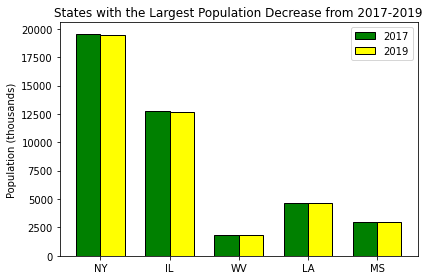

In [32]:
pop_losses1 = ST_pop_losses[2017]
pop_losses2 = ST_pop_losses[2019]

ind = np.arange(len(pop_losses1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, pop_losses1, width,
                label='2017', color='green', edgecolor='black')
rects2 = ax.bar(ind + width/2, pop_losses2, width,
                label='2019', color='yellow', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population (thousands)')
ax.set_title('States with the Largest Population Decrease from 2017-2019')
ax.set_xticks(ind)
ax.set_xticklabels(('NY', 'IL', 'WV', 'LA', 'MS'))
ax.legend()

fig.tight_layout()

plt.show()

In [33]:
ST_pop_losses['Percent_Change'] = round(ST_pop_losses['Prop_Change']*100, 2).astype(str) + '%'
display(ST_pop_losses[['Percent_Change']])

,Percent_Change
NY,-0.69%
IL,-0.84%
WV,-1.37%
LA,-0.47%
MS,-0.41%


### _States with the Biggest Gains in Population_

Looking at the states with the biggest total gains in population over the two year period, the gains can be seen much more clearly. 

In [34]:
display(ST_pop_gains.drop(columns='Prop_Change'))

,2017,2019,Change
GA,10410.330,10617.423,207.093
NC,10268.233,10488.084,219.851
AZ,7044.008,7278.717,234.709
FL,20963.613,21477.737,514.124
TX,28295.273,28995.881,700.608


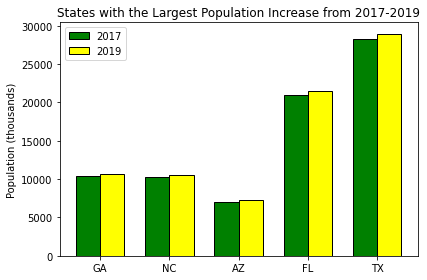

In [35]:
pop_gains1 = ST_pop_gains[2017]
pop_gains2 = ST_pop_gains[2019]

ind = np.arange(len(pop_gains1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, pop_gains1, width,
                label='2017', color='green', edgecolor='black')
rects2 = ax.bar(ind + width/2, pop_gains2, width,
                label='2019', color='yellow', edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Population (thousands)')
ax.set_title('States with the Largest Population Increase from 2017-2019')
ax.set_xticks(ind)
ax.set_xticklabels(('GA', 'NC', 'AZ', 'FL', 'TX'))
ax.legend()

fig.tight_layout()

plt.show()

In [36]:
ST_pop_gains['Percent_Change'] = round(ST_pop_gains['Prop_Change']*100, 2).astype(str) + '%'
display(ST_pop_gains[['Percent_Change']])

,Percent_Change
GA,1.99%
NC,2.14%
AZ,3.33%
FL,2.45%
TX,2.48%


## The Number of Private Schools
Let's now look at the number of private schools in each state for the 17-18 school year and the 19-20 school year.

### _2017-2018 School Year_

In [37]:
# This is the head of the data from 2017-2018
df_17_18_sml = df_17_18[['X', 'Y', 'PPIN', 'NAME', 'STREET', 'CITY', 'STATE', 'SCHOOLYEAR']]
display(df_17_18_sml.head(5))

,X,Y,PPIN,NAME,STREET,CITY,STATE,SCHOOLYEAR
0,-86.541882,32.472096,2722,AUTAUGA ACADEMY,497 GOLSON RD,PRATTVILLE,AL,2017-2018
1,-86.457878,32.469057,A0100060,CAMELLIA BAPTIST WEM,201 WOODVALE RD,PRATTVILLE,AL,2017-2018
2,-86.424686,32.499700,A0500015,EAST MEMORIAL CHRISTIAN ACADEMY,1320 OLD RIDGE RD N,PRATTVILLE,AL,2017-2018
3,-86.472066,32.460806,A0900032,FIRST PRESBYTERIAN KINDERGARTEN,211 S CHESTNUT ST,PRATTVILLE,AL,2017-2018
4,-86.466886,32.459906,A1300011,FOUNTAIN CITY BAPTIST HOME SCHOOL,237 S NORTHINGTON ST,PRATTVILLE,AL,2017-2018


### _2019-2020 School Year_

In [38]:
# This is the head of the data from 2019-2020
df_19_20_sml = df_19_20[['X', 'Y', 'PPIN', 'NAME', 'STREET', 'CITY', 'STATE', 'SCHOOLYEAR']]
display(df_19_20_sml.head(5))

,X,Y,PPIN,NAME,STREET,CITY,STATE,SCHOOLYEAR
0,-85.989151,34.023810,33,ST JAMES CATHOLIC SCHOOL,511 EWING AVE,GADSDEN,AL,2019-2020
1,-87.529118,33.173709,44,HOLY SPIRIT CATHOLIC SCHOOL,601 JAMES I HARRISON JR PKWY E,TUSCALOOSA,AL,2019-2020
2,-86.603421,34.734490,55,HOLY FAMILY PAROCHIAL SCHOOL,2300 BEASLEY AVE NW,HUNTSVILLE,AL,2019-2020
3,-86.572216,34.690402,77,HOLY SPIRIT REGIONAL CATHOLIC SCHOOL,619 AIRPORT RD SW,HUNTSVILLE,AL,2019-2020
4,-86.841558,34.177923,135,SACRED HEART ELEMENTARY,112 2ND AVE SE,CULLMAN,AL,2019-2020


In [39]:
# Since I didn't have population data for DC, I removed it from my school numbers as well
df_17_18_sch_num = df_17_18_sml.groupby('STATE').size()
df_17_18_sch_num.drop('DC', inplace=True)

df_19_20_sch_num = df_19_20_sml.groupby('STATE').size()
df_19_20_sch_num.drop('DC', inplace=True)

In [40]:
df_sch_chg = pd.concat([df_17_18_sch_num, df_19_20_sch_num], axis=1)
df_sch_chg.reset_index(inplace=True)
df_sch_chg.rename(columns={'STATE': 'State', 0:'Schools in 17-18', 1:'Schools in 19-20'}, inplace=True)
df_sch_chg['Amt_Change'] = df_sch_chg['Schools in 19-20'] - df_sch_chg['Schools in 17-18']
df_sch_chg['Prop_Change'] = df_sch_chg['Amt_Change']/df_sch_chg['Schools in 17-18']
df_amt_chg = df_sch_chg.sort_values('Amt_Change', ignore_index=True)
big_losses = df_amt_chg.copy().iloc[:5]
big_gains = df_amt_chg.copy().iloc[45:]

### _How Many States Had Losses in the Number of Private Schools?_

In [41]:
st_gained_or_same = len(df_amt_chg.query('Amt_Change >= 0'))
st_losses = len(df_amt_chg.query('Amt_Change < 0'))
print(f"The number of states that gained private schools (or stayed the same): {st_gained_or_same}")
print(f"The number of states that lost private schools: {st_losses}")
print(f"The number of private schools in the U.S. declined in 82% of states.")

The number of states that gained private schools (or stayed the same): 9
The number of states that lost private schools: 41
The number of private schools in the U.S. declined in 82% of states.


### _States with the Biggest Losses in Number of Private Schools_
The drop in the number of private schools in these states over a two year period is remarkable.

In [42]:
display(big_losses.drop(columns='Prop_Change'))

,State,Schools in 17-18,Schools in 19-20,Amt_Change
0,CA,2514,2315,-199
1,NY,1334,1147,-187
2,FL,1850,1723,-127
3,IL,1041,918,-123
4,OH,1021,948,-73


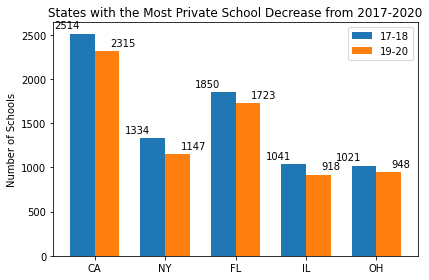

In [43]:
big_losses1 = big_losses['Schools in 17-18']
big_losses2 = big_losses['Schools in 19-20']

ind = np.arange(len(big_losses1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, big_losses1, width,
                label='17-18')
rects2 = ax.bar(ind + width/2, big_losses2, width,
                label='19-20')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Schools')
ax.set_title('States with the Most Private School Decrease from 2017-2020')
ax.set_xticks(ind)
ax.set_xticklabels(('CA', 'NY', 'FL', 'IL', 'OH'))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

In [44]:
big_losses['Percent_Change'] = round(big_losses['Prop_Change']*100, 2).astype(str) + '%'
display(big_losses[['State','Percent_Change']])

,State,Percent_Change
0,CA,-7.92%
1,NY,-14.02%
2,FL,-6.86%
3,IL,-11.82%
4,OH,-7.15%


### _States with the Biggest Gains in Number of Private Schools_
Compared to the states with losses, most of the gains are negligible. However, Texas has an increase of 53 new private schools.

In [45]:
display(big_gains.drop(columns='Prop_Change'))

,State,Schools in 17-18,Schools in 19-20,Amt_Change
45,IN,618,623,5
46,OK,128,135,7
47,AR,122,129,7
48,AZ,250,264,14
49,TX,1188,1241,53


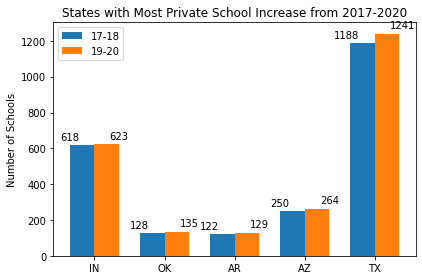

In [46]:
big_gains1 = big_gains['Schools in 17-18']
big_gains2 = big_gains['Schools in 19-20']

ind = np.arange(len(big_gains1))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, big_gains1, width,
                label='17-18')
rects2 = ax.bar(ind + width/2, big_gains2, width,
                label='19-20')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Schools')
ax.set_title('States with Most Private School Increase from 2017-2020')
ax.set_xticks(ind)
ax.set_xticklabels(('IN', 'OK','AR', 'AZ', 'TX'))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()

plt.show()

In [47]:
# This combines the school numbers data with the state population data
df_17_sch_num_pop = pd.concat([df_17_18_sch_num, state_pops_17], axis=1).rename(columns={0:'SCHOOLS', 2017: '2017_POP'})
df_19_sch_num_pop = pd.concat([df_19_20_sch_num, state_pops_19], axis=1).rename(columns={0:'SCHOOLS', 2019: '2019_POP'})


### _Maps of the Changes in Private Schools_
First, let's look at the proportion of changes in private schools for each of the states.

In [48]:
fig = px.choropleth(df_sch_chg, locationmode="USA-states", locations='State', color='Prop_Change',
                           color_continuous_scale="RdBu",
                           range_color=(-0.15, 0.15),
                           scope="usa",
                           labels={'Prop_Change':'Proportion Change'}
                          )
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}, title_text = 'Change in the Proportion of Private Schools by State 2017-2019')
fig.show()

Now, let's look at the change in the total number of private schools in each state.

In [49]:
fig = px.choropleth(df_sch_chg, locationmode="USA-states", locations='State', color='Amt_Change',
                           color_continuous_scale="RdBu",
                           range_color=(-200, 200),
                           scope="usa",
                           labels={'Amt_Change':'Change (Private Schools)'}
                          )
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0}, title_text = 'Change in the Total Number of Private Schools by State 2017-2019')
fig.show()

## Population vs. Number of Private Schools
This scatterplot shows the population vs. the number of schools for all 50 states for both 2017 and 2019. 

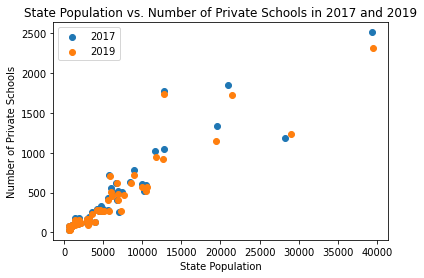

In [50]:
# This creates a scatterplot of the state population vs. the number of private schools

fig, ax = plt.subplots()
ax.scatter(df_17_sch_num_pop['2017_POP'], df_17_sch_num_pop['SCHOOLS'], label='2017')
ax.scatter(df_19_sch_num_pop['2019_POP'], df_19_sch_num_pop['SCHOOLS'], label='2019')
ax.set_ylabel('Number of Private Schools')
ax.set_xlabel('State Population')
ax.set_title('State Population vs. Number of Private Schools in 2017 and 2019')
ax.legend()

plt.show()

Not surprisingly, states with a larger population tend to have more private schools. 

Let's combine the school change data and the population change data into a single dataframe, so we can take a look as some of the exceptions to the rule.

<ipython-input-51-9199f2d47d2e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



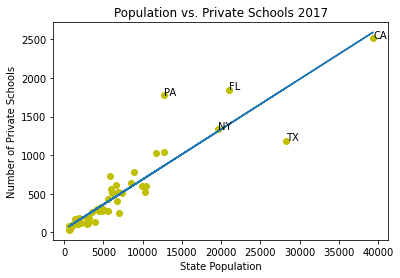

In [51]:
df_sch_chg2 = df_sch_chg.copy().set_index('State')
df_sch_chg2.rename(columns={'Prop_Change':'Sch_Prop_Chg'}, inplace=True)
state_pop_chg.rename(columns={'Prop_Change': 'Pop_Prop_Chg'}, inplace=True)
df_combined = pd.concat([state_pop_chg, df_sch_chg2], axis=1)

# These are the states with private schools over 1100 as of 2017
df_top_states = df_combined[df_combined['Schools in 17-18'] > 1100]
df_top_states['States'] = df_top_states.index.values

# Most of this setup will be used in the "Top Private School's Scatterplot" 
# However, the ordered pairs and labels will be used to annotate the top states in this scatterplot.
x1 = df_top_states[2017]
y1 = df_top_states['Schools in 17-18']
z1 = df_top_states.index.values

x2 = df_top_states[2019]
y2 = df_top_states['Schools in 19-20']
z2 = df_top_states.index.values

fig, ax0 = plt.subplots()

# I want to label the top states in the general scatterplot
for i, txt in enumerate(z1):
    ax0.annotate(txt, (x1[i], y1[i]))

ax0.set_ylabel('Number of Private Schools')
ax0.set_xlabel('State Population')
ax0.set_title('Population vs. Private Schools 2017')

# This creates a Least-Squares-Regression-Line for the data
# First, we grab the x and y coordinates of the points on the scatterplot
x3 = df_combined[2017]
y3 = df_combined['Schools in 17-18']

# To use the lstsq method from numpy, we need a matrix A which has the x-data values and a column of ones
ones = np.ones(len(x3))
A = np.vstack([x3, ones]).T
coef = np.linalg.lstsq(A, y3, rcond=None)
m, c = coef[0]

# Here are the predicted y-values using our LSRL
pred_y3 = m*x3 + c

# The scatterplot
ax0.plot(x3, y3, 'yo') 

# The LSRL
ax0.plot(x3, pred_y3)

plt.show()



As you can see, Texas has fewer private schools than predicted based on its population. Pennsylvania and Florida have more private schools than predicted based on their population. 

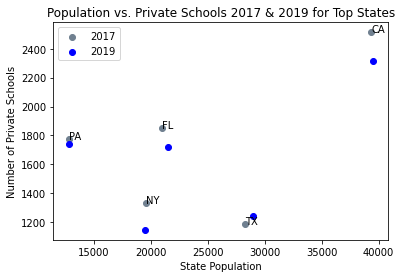

In [52]:
x1 = df_top_states[2017]
y1 = df_top_states['Schools in 17-18']
z1 = df_top_states.index.values

x2 = df_top_states[2019]
y2 = df_top_states['Schools in 19-20']
z2 = df_top_states.index.values

fig, ax1 = plt.subplots()
ax1.scatter(x1, y1, c='slategrey', label='2017')
ax1.scatter(x2, y2, c='blue', label='2019')

for i, txt in enumerate(z1):
    ax1.annotate(txt, (x1[i], y1[i]))

ax1.set_ylabel('Number of Private Schools')
ax1.set_xlabel('State Population')
ax1.set_title('Population vs. Private Schools 2017 & 2019 for Top States')
ax1.legend()

The scatterplot above shows the change in the population and the number of private schools for the top five states (by number of private schools) from 2017 to 2019.

### Percent Change of Number of Schools vs. Percent Change of Population
Let's look at a visual representation of whether there's an association between states that grew and also tended to gain private schools, and if the states whose population declined tended to also see a decline in private schools as well.

Now, we add two columns to show whether a state had and increase or decrease in population and private schools. 

In [53]:
df_combined['School_Inc_Dec'] = 'Increase'
df_combined.loc[df_combined['Sch_Prop_Chg'] < 0 , 'School_Inc_Dec'] = 'Decrease'
df_combined['Pop_Inc_Dec'] = 'Increase'
df_combined.loc[df_combined['Pop_Prop_Chg'] < 0 , 'Pop_Inc_Dec'] = 'Decrease'
df_combined.sample(5)

,2017,2019,Change,Pop_Prop_Chg,Schools in 17-18,Schools in 19-20,Amt_Change,Sch_Prop_Chg,School_Inc_Dec,Pop_Inc_Dec
HI,1424.393,1415.872,-8.521,-0.005982,108,97,-11,-0.101852,Decrease,Decrease
NV,2969.905,3080.156,110.251,0.037123,112,97,-15,-0.133929,Decrease,Increase
CT,3573.297,3565.287,-8.010,-0.002242,261,231,-30,-0.114943,Decrease,Decrease
AZ,7044.008,7278.717,234.709,0.033320,250,264,14,0.056000,Increase,Increase
NJ,8885.525,8882.190,-3.335,-0.000375,781,718,-63,-0.080666,Decrease,Decrease


This is a crosstab of the number of states for each combination of outcomes. As you can see the vast majority of states had an increase in population but a decline in the number of private schools.

In [54]:
pd.crosstab(index=df_combined['Pop_Inc_Dec'], columns=df_combined['School_Inc_Dec'])

School_Inc_Dec,Decrease,Increase
Pop_Inc_Dec,,
Decrease,9,2
Increase,32,7


Based on the values in those two columns, a color-number is assigned for the scatterplot. 

In [55]:
df_combined['Color'] = 'Red'
df_combined.loc[(df_combined['School_Inc_Dec']=='Increase') & (df_combined['Pop_Inc_Dec']=='Decrease') , 'Color'] = 'Blue'
df_combined.loc[(df_combined['School_Inc_Dec']=='Decrease') & (df_combined['Pop_Inc_Dec']=='Increase') , 'Color'] = 'Green'
df_combined.loc[(df_combined['School_Inc_Dec']=='Increase') & (df_combined['Pop_Inc_Dec']=='Increase') , 'Color'] = 'Purple'


This scatterplot summarizes visually what the table shows above.

RED DOTS: States that lost population and lost private schools

GREEN DOTS: States that gained population and lost private schools (MOST STATES)

BLUE DOTS: States that lost population and gained private schools

PURPLE DOTS: States that gained population and gained private schools

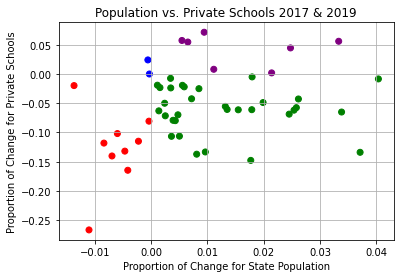

In [58]:
plt.scatter(df_combined['Pop_Prop_Chg'], df_combined['Sch_Prop_Chg'], color=df_combined['Color'])
plt.grid(True)
plt.ylabel('Proportion of Change for Private Schools')
plt.xlabel('Proportion of Change for State Population')
plt.title('Population vs. Private Schools 2017 & 2019')
plt.show()

### A Weird Name For a School: "C/O Sam Brubaker, Chairman"
While I was looking through the data, I noticed a really bizzare school name. In fact, it was the name of 20 schools. After doing a little research I found that this is the name of the chairman of several menonite schools in Pennsylvania. Here's the head of that subset of schools from the DF.

In [59]:
# A little research showed that these school are small menonite schools in PA
display(df_17_18[df_17_18['NAME']=='C/O SAM BRUBAKER, CHAIRMAN'].head())

,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,STFIP,SCHOOLYEAR
17348,-75.936315,40.095384,17349,A9702965,"C/O SAM BRUBAKER, CHAIRMAN",305 MILL RD,NARVON,PA,17555,42,2017-2018
17807,-75.986763,40.119838,17808,1200224,"C/O SAM BRUBAKER, CHAIRMAN",201 BRIDGEVILLE RD,EAST EARL,PA,17519,42,2017-2018
17811,-75.942655,40.168190,17812,1201771,"C/O SAM BRUBAKER, CHAIRMAN",2502 ZERBE ST,NARVON,PA,17555,42,2017-2018
17813,-76.111060,40.255766,17814,1907593,"C/O SAM BRUBAKER, CHAIRMAN",362 BRUNNERS GROVE RD,REINHOLDS,PA,17569,42,2017-2018
17815,-76.028833,40.141678,17816,1907618,"C/O SAM BRUBAKER, CHAIRMAN",308 READING RD,EAST EARL,PA,17519,42,2017-2018


### With More Time:
If I had more time, I would like to use some of the tools that we learned like PCA/SVD to analyze this further. It seems like this would be an appropriate use for such tools.

Additionally, I wish that I could have found enrollment data for all of the schools. Also, it would be really interesting to look at public school enrollments as well as class sizes for both public and private schools.